In [2]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


In [3]:
df = pd.read_csv("dataset.csv")
df.head()

Marital status  Application mode  Application order  Course  \
0               1                 8                  5       2   
1               1                 6                  1      11   
2               1                 1                  5       5   
3               1                 8                  2      15   
4               2                12                  1       3   

   Daytime/evening attendance  Previous qualification  Nacionality  \
0                           1                       1            1   
1                           1                       1            1   
2                           1                       1            1   
3                           1                       1            1   
4                           0                       1            1   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                      13                      10                    6  ...   
1                       1                       3                    4  ...   
2                      22                      27                   10  ...   
3                      23                      27                    6  ...   
4                      22                      28                   10  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    0   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    6   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                       0   
3                                      10   
4                                       6   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.666667   
2                                    0                          0.000000   
3                                    5                         12.400000   
4                                    6                         13.000000   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 35 columns]

In [4]:
df.info()
target_col = 'Target'            # ƒë·ªïi n·∫øu t√™n kh√°c


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


Target counts:


count  proportion
Target                     
Graduate   2209       49.93
Dropout    1421       32.12
Enrolled    794       17.95

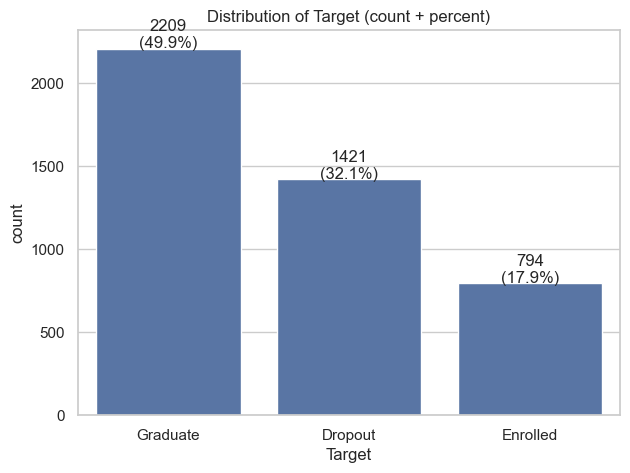

In [7]:

# 4. Target distribution (counts + %)
vc = df[target_col].value_counts()
vc_perc = df[target_col].value_counts(normalize=True)*100
print("Target counts:")
display(pd.concat([vc, vc_perc.round(2)], axis=1).rename(columns={0:"count", target_col:"percent"}))

plt.figure(figsize=(7,5))
ax = sns.countplot(x=target_col, data=df, order=vc.index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, f'{int(height)}\n({height/len(df):.1%})', ha="center")
plt.title("Distribution of Target (count + percent)")
plt.show()


### Nh·∫≠n x√©t bi·ªÉu ƒë·ªì ph√¢n b·ªë **Target**

- **Aspect ‚Äì Class Imbalance**  
  Bi·ªÉu ƒë·ªì cho th·∫•y c√≥ s·ª± **m·∫•t c√¢n b·∫±ng l·ªõp (class imbalance)**.  
  S·ªë l∆∞·ª£ng **Graduate** (sinh vi√™n t·ªët nghi·ªáp) chi·∫øm nhi·ªÅu nh·∫•t, cao h∆°n r√µ r·ªát so v·ªõi **Dropout** (sinh vi√™n b·ªè h·ªçc) v√† **Enrolled** (sinh vi√™n ƒëang theo h·ªçc).  

- **Description**  
  - Graduate: ~2200 sinh vi√™n  
  - Dropout: ~1400 sinh vi√™n  
  - Enrolled: ~800 sinh vi√™n  

- **Implications**  
  - S·ª± m·∫•t c√¢n b·∫±ng n√†y c√≥ th·ªÉ l√†m m√¥ h√¨nh h·ªçc m√°y **thi√™n l·ªách** v·ªÅ ph√≠a d·ª± ƒëo√°n nh√≥m ƒëa s·ªë (Graduate).  
  - N·∫øu kh√¥ng x·ª≠ l√Ω, m√¥ h√¨nh c√≥ th·ªÉ ƒë·∫°t ƒë·ªô ch√≠nh x√°c t·ªïng th·ªÉ cao nh∆∞ng **d·ª± ƒëo√°n k√©m** cho c√°c l·ªõp thi·ªÉu s·ªë (Dropout, Enrolled).  

- **Techniques to Address**  
  1. **Resampling**  
     - Oversampling c√°c l·ªõp thi·ªÉu s·ªë (Dropout, Enrolled).  
     - Undersampling l·ªõp ƒëa s·ªë (Graduate).  
  2. **Class Weights**  
     - ƒêi·ªÅu ch·ªânh tr·ªçng s·ªë trong m√¥ h√¨nh ƒë·ªÉ tƒÉng t·∫ßm quan tr·ªçng c·ªßa Dropout v√† Enrolled.  

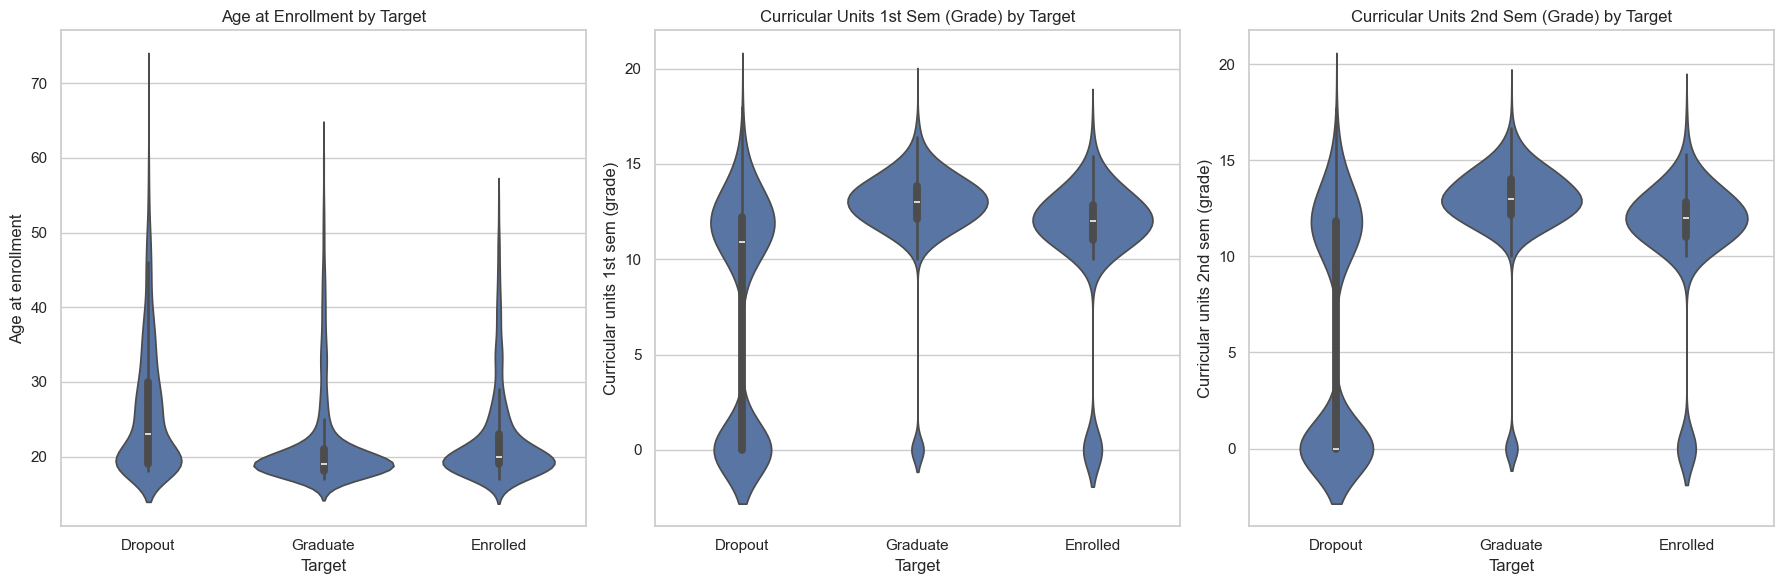

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot cho c√°c ƒë·∫∑c tr∆∞ng
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Violin plot cho Age at enrollment
sns.violinplot(data=df, x='Target', y='Age at enrollment', ax=axes[0])
axes[0].set_title('Age at Enrollment by Target')

# Violin plot cho Curricular units 1st sem (grade)
sns.violinplot(data=df, x='Target', y='Curricular units 1st sem (grade)', ax=axes[1])
axes[1].set_title('Curricular Units 1st Sem (Grade) by Target')

# Violin plot cho Curricular units 2nd sem (grade)
sns.violinplot(data=df, x='Target', y='Curricular units 2nd sem (grade)', ax=axes[2])
axes[2].set_title('Curricular Units 2nd Sem (Grade) by Target')

plt.tight_layout()
plt.show()


### Nh·∫≠n x√©t bi·ªÉu ƒë·ªì Pairplot (Age at enrollment, Curricular units 1st sem, Curricular units 2nd sem)

- **Graduates**  
  - C√°c ƒëi·ªÉm d·ªØ li·ªáu c√≥ **ƒëi·ªÉm ƒë·∫ßu v√†o cao** th∆∞·ªùng ƒëi k√®m v·ªõi **ƒëi·ªÉm cao ·ªü h·ªçc k·ª≥ 1 v√† h·ªçc k·ª≥ 2**.  
  - ƒêi·ªÅu n√†y cho th·∫•y **m·ªëi t∆∞∆°ng quan d∆∞∆°ng** gi·ªØa ƒëi·ªÉm ƒë·∫ßu v√†o v√† th√†nh t√≠ch h·ªçc t·∫≠p, g√≥p ph·∫ßn gi√∫p sinh vi√™n c√≥ kh·∫£ nƒÉng t·ªët nghi·ªáp.  

- **Dropouts**  
  - Nhi·ªÅu ƒëi·ªÉm d·ªØ li·ªáu t·∫≠p trung ·ªü m·ª©c **ƒëi·ªÉm th·∫•p ho·∫∑c b·∫±ng 0** trong h·ªçc k·ª≥ 1 v√† h·ªçc k·ª≥ 2.  
  - ƒêi·ªÅu n√†y g·ª£i √Ω r·∫±ng nh·ªØng sinh vi√™n b·ªè h·ªçc th∆∞·ªùng g·∫∑p kh√≥ khƒÉn trong ch∆∞∆°ng tr√¨nh, kh√¥ng theo k·ªãp m√¥n h·ªçc ho·∫∑c c√≥ y·∫øu t·ªë kh√°c t√°c ƒë·ªông.  

- **Enrolled**  
  - C√°c ƒëi·ªÉm ph√¢n b·ªë r·∫£i r√°c, ch·ªß y·∫øu n·∫±m ·ªü **m·ª©c trung b√¨nh** v·ªÅ ƒëi·ªÉm s·ªë.  
  - Nh√≥m n√†y ƒëang ti·∫øp t·ª•c h·ªçc, ch∆∞a c√≥ th√†nh t√≠ch n·ªïi b·∫≠t nh∆∞ng v·∫´n c√≤n kh·∫£ nƒÉng c·∫£i thi·ªán ƒë·ªÉ h∆∞·ªõng t·ªõi t·ªët nghi·ªáp.  

---

In [9]:

# 5. Identify numeric & categorical
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
if target_col in cat_cols:
    cat_cols.remove(target_col)
print("Numeric cols:", len(numeric_cols))
print("Categorical cols:", len(cat_cols))


Numeric cols: 34
Categorical cols: 0


skewness
Educational special needs                       9.154976
Curricular units 1st sem (without evaluations)  8.207403
Nacionality                                     7.282730
Curricular units 2nd sem (without evaluations)  7.267701
International                                   6.104830
Curricular units 2nd sem (credited)             4.634820
Marital status                                  4.399764
Curricular units 1st sem (credited)             4.169049
Father's occupation                             4.058407
Debtor                                          2.434652
Previous qualification                          2.405934
Mother's occupation                             2.231227
Age at enrollment                               2.054988
Application order                               1.881050
Curricular units 1st sem (enrolled)             1.619041
Scholarship holder                              1.164871
Curricular units 1st sem (evaluations)          0.976637
Curricular units 2nd sem (enrolled)             0.788114
Curricular units 1st sem (approved)             0.766262
Gender                                          0.621279
Curricular units 2nd sem (evaluations)          0.336497
Curricular units 2nd sem (approved)             0.306279
Inflation rate                                  0.252375
Unemployment rate                               0.212051
Application mode                                0.121696
Mother's qualification                         -0.097197
Course                                         -0.189557
Displaced                                      -0.194468
Father's qualification                         -0.291740
GDP                                            -0.394068
Curricular units 2nd sem (grade)               -1.313650
Curricular units 1st sem (grade)               -1.568146
Tuition fees up to date                        -2.349054
Daytime/evening attendance                     -2.507238

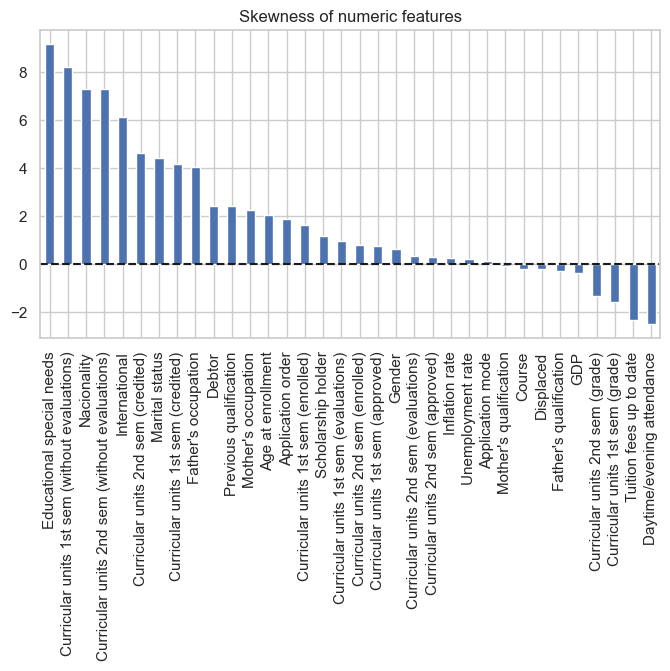

In [10]:

# 7. Skewness table (to decide transforms)
skewness = df[numeric_cols].skew().sort_values(ascending=False)
display(skewness.to_frame(name="skewness"))

plt.figure(figsize=(8,4))
skewness.plot.bar()
plt.axhline(0, color='k', linestyle='--')
plt.title("Skewness of numeric features")
plt.show()


Bi·∫øn l·ªách ph·∫£i m·∫°nh (skewness cao d∆∞∆°ng):

Educational special needs, Curricular units (evaluations), Father‚Äôs occupation, Debtor, ‚Ä¶

ƒêi·ªÅu n√†y nghƒ©a l√† ph·∫ßn l·ªõn sinh vi√™n c√≥ gi√° tr·ªã th·∫•p ·ªü nh·ªØng bi·∫øn n√†y, ch·ªâ m·ªôt s·ªë √≠t c√≥ gi√° tr·ªã cao. V√≠ d·ª•, h·∫ßu h·∫øt sinh vi√™n kh√¥ng c√≥ nhu c·∫ßu gi√°o d·ª•c ƒë·∫∑c bi·ªát, ch·ªâ m·ªôt v√†i c√≥ nhu c·∫ßu ‚Üí d·∫´n ƒë·∫øn skewness cao.

Bi·∫øn g·∫ßn chu·∫©n (skewness ‚âà 0):

Application mode, Gender, Curricular units (approved) ‚Ä¶

Nh·ªØng bi·∫øn n√†y ph√¢n ph·ªëi d·ªØ li·ªáu c√¢n ƒë·ªëi, thu·∫≠n l·ª£i cho m√¥ h√¨nh.

Bi·∫øn l·ªách tr√°i (skewness √¢m):

Tuition fees up to date, Daytime/evening attendance, Curricular units (grades), ‚Ä¶

T·ª©c l√† ph·∫ßn l·ªõn sinh vi√™n c√≥ gi√° tr·ªã cao, √≠t sinh vi√™n c√≥ gi√° tr·ªã th·∫•p. V√≠ d·ª•, nhi·ªÅu sinh vi√™n ƒë√≥ng h·ªçc ph√≠ ƒë√∫ng h·∫°n ‚Üí d·ªØ li·ªáu nghi√™ng v·ªÅ ph√≠a cao.

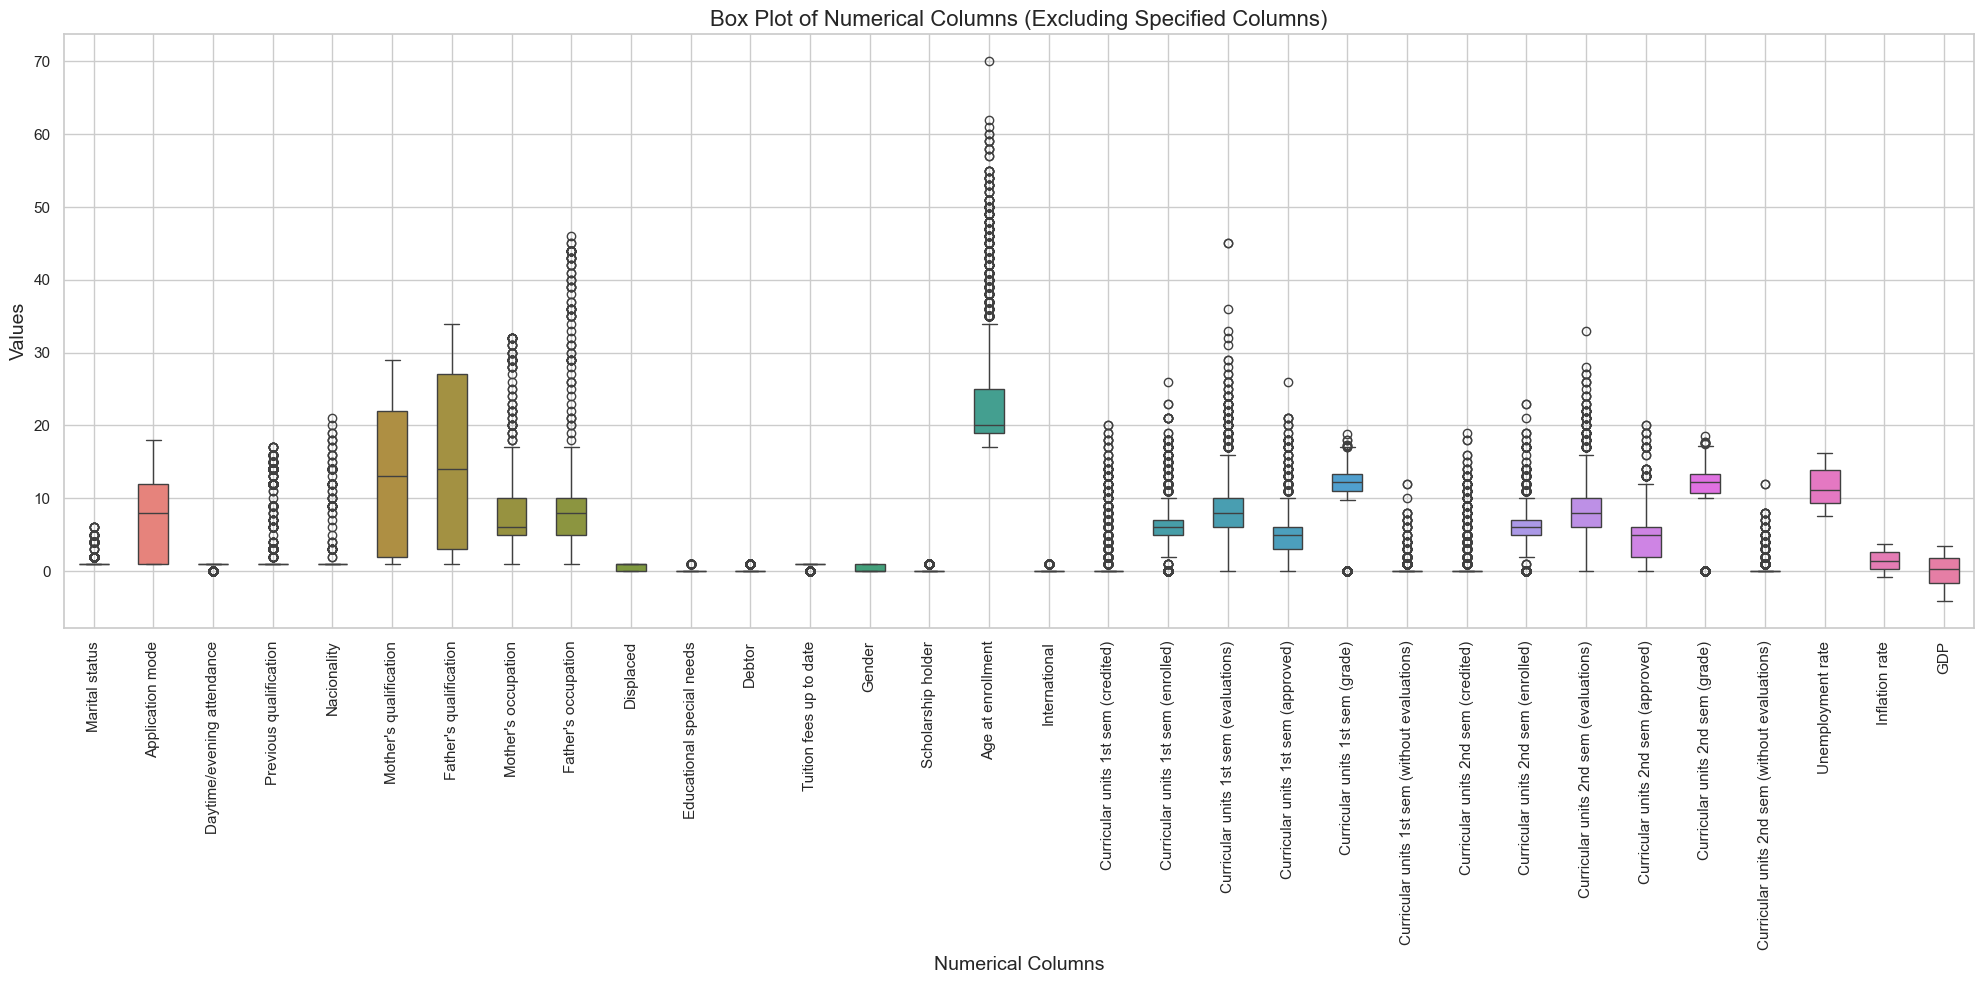

In [11]:
exclude_columns = ['Application order', 'Course']
numerical_cols = df.select_dtypes(include=['number']).drop(columns=exclude_columns).columns
plt.figure(figsize=(20, 10))
sns.boxplot(data=df[numerical_cols], orient='v', width=0.5)
plt.title('Box Plot of Numerical Columns (Excluding Specified Columns)', fontsize=16)
plt.xlabel('Numerical Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Nh√≥m c√≥ ƒë·ªô l·ªách d∆∞∆°ng cao (skewness > 4):

Educational special needs, Curricular units (evaluations), Father‚Äôs occupation, Debtor‚Ä¶

C√°c bi·∫øn n√†y ph√¢n ph·ªëi l·ªách ph·∫£i m·∫°nh ‚Üí ph·∫ßn l·ªõn d·ªØ li·ªáu t·∫≠p trung ·ªü gi√° tr·ªã th·∫•p (g·∫ßn 0), ch·ªâ m·ªôt s·ªë √≠t gi√° tr·ªã cao.

V√≠ d·ª•: h·∫ßu h·∫øt sinh vi√™n kh√¥ng n·ª£ h·ªçc ph√≠, kh√¥ng c√≥ nhu c·∫ßu ƒë·∫∑c bi·ªát, kh√¥ng nhi·ªÅu m√¥n b·ªã ƒë√°nh gi√° l·∫°i ‚Üí d·∫´n ƒë·∫øn skewness cao.

Nh√≥m c√≥ ƒë·ªô l·ªách d∆∞∆°ng v·ª´a (skewness kho·∫£ng 1‚Äì4):

Previous qualification, Mother‚Äôs occupation, Age at enrollment‚Ä¶

Ph√¢n ph·ªëi l·ªách ph·∫£i nh∆∞ng √≠t h∆°n. ƒêi·ªÅu n√†y cho th·∫•y d·ªØ li·ªáu kh√¥ng c√¢n ƒë·ªëi ho√†n to√†n, c√≥ xu h∆∞·ªõng nhi·ªÅu gi√° tr·ªã th·∫•p nh∆∞ng c≈©ng c√≥ l∆∞·ª£ng ƒë√°ng k·ªÉ gi√° tr·ªã cao.

Nh√≥m g·∫ßn chu·∫©n (skewness ‚âà 0):

Application mode, Curricular units (enrolled/approved), Gender‚Ä¶

Ph√¢n ph·ªëi kh√° c√¢n b·∫±ng, d·ªØ li·ªáu ph√¢n b·ªë ƒë·ªìng ƒë·ªÅu h∆°n ‚Üí kh√¥ng c·∫ßn bi·∫øn ƒë·ªïi nhi·ªÅu, c√≥ th·ªÉ d√πng tr·ª±c ti·∫øp trong m√¥ h√¨nh.

Nh√≥m l·ªách tr√°i (skewness < 0):

Tuition fees up to date, Curricular units (grades), Daytime/evening attendance‚Ä¶

Ph·∫ßn l·ªõn sinh vi√™n r∆°i v√†o gi√° tr·ªã cao (v√≠ d·ª•: ƒë√≥ng h·ªçc ph√≠ ƒë·∫ßy ƒë·ªß, ƒëi·ªÉm s·ªë cao, ƒëa s·ªë h·ªçc ban ng√†y).

√çt tr∆∞·ªùng h·ª£p r∆°i v√†o gi√° tr·ªã th·∫•p ‚Üí d·ªØ li·ªáu b·ªã l·ªách v·ªÅ ph√≠a cao.

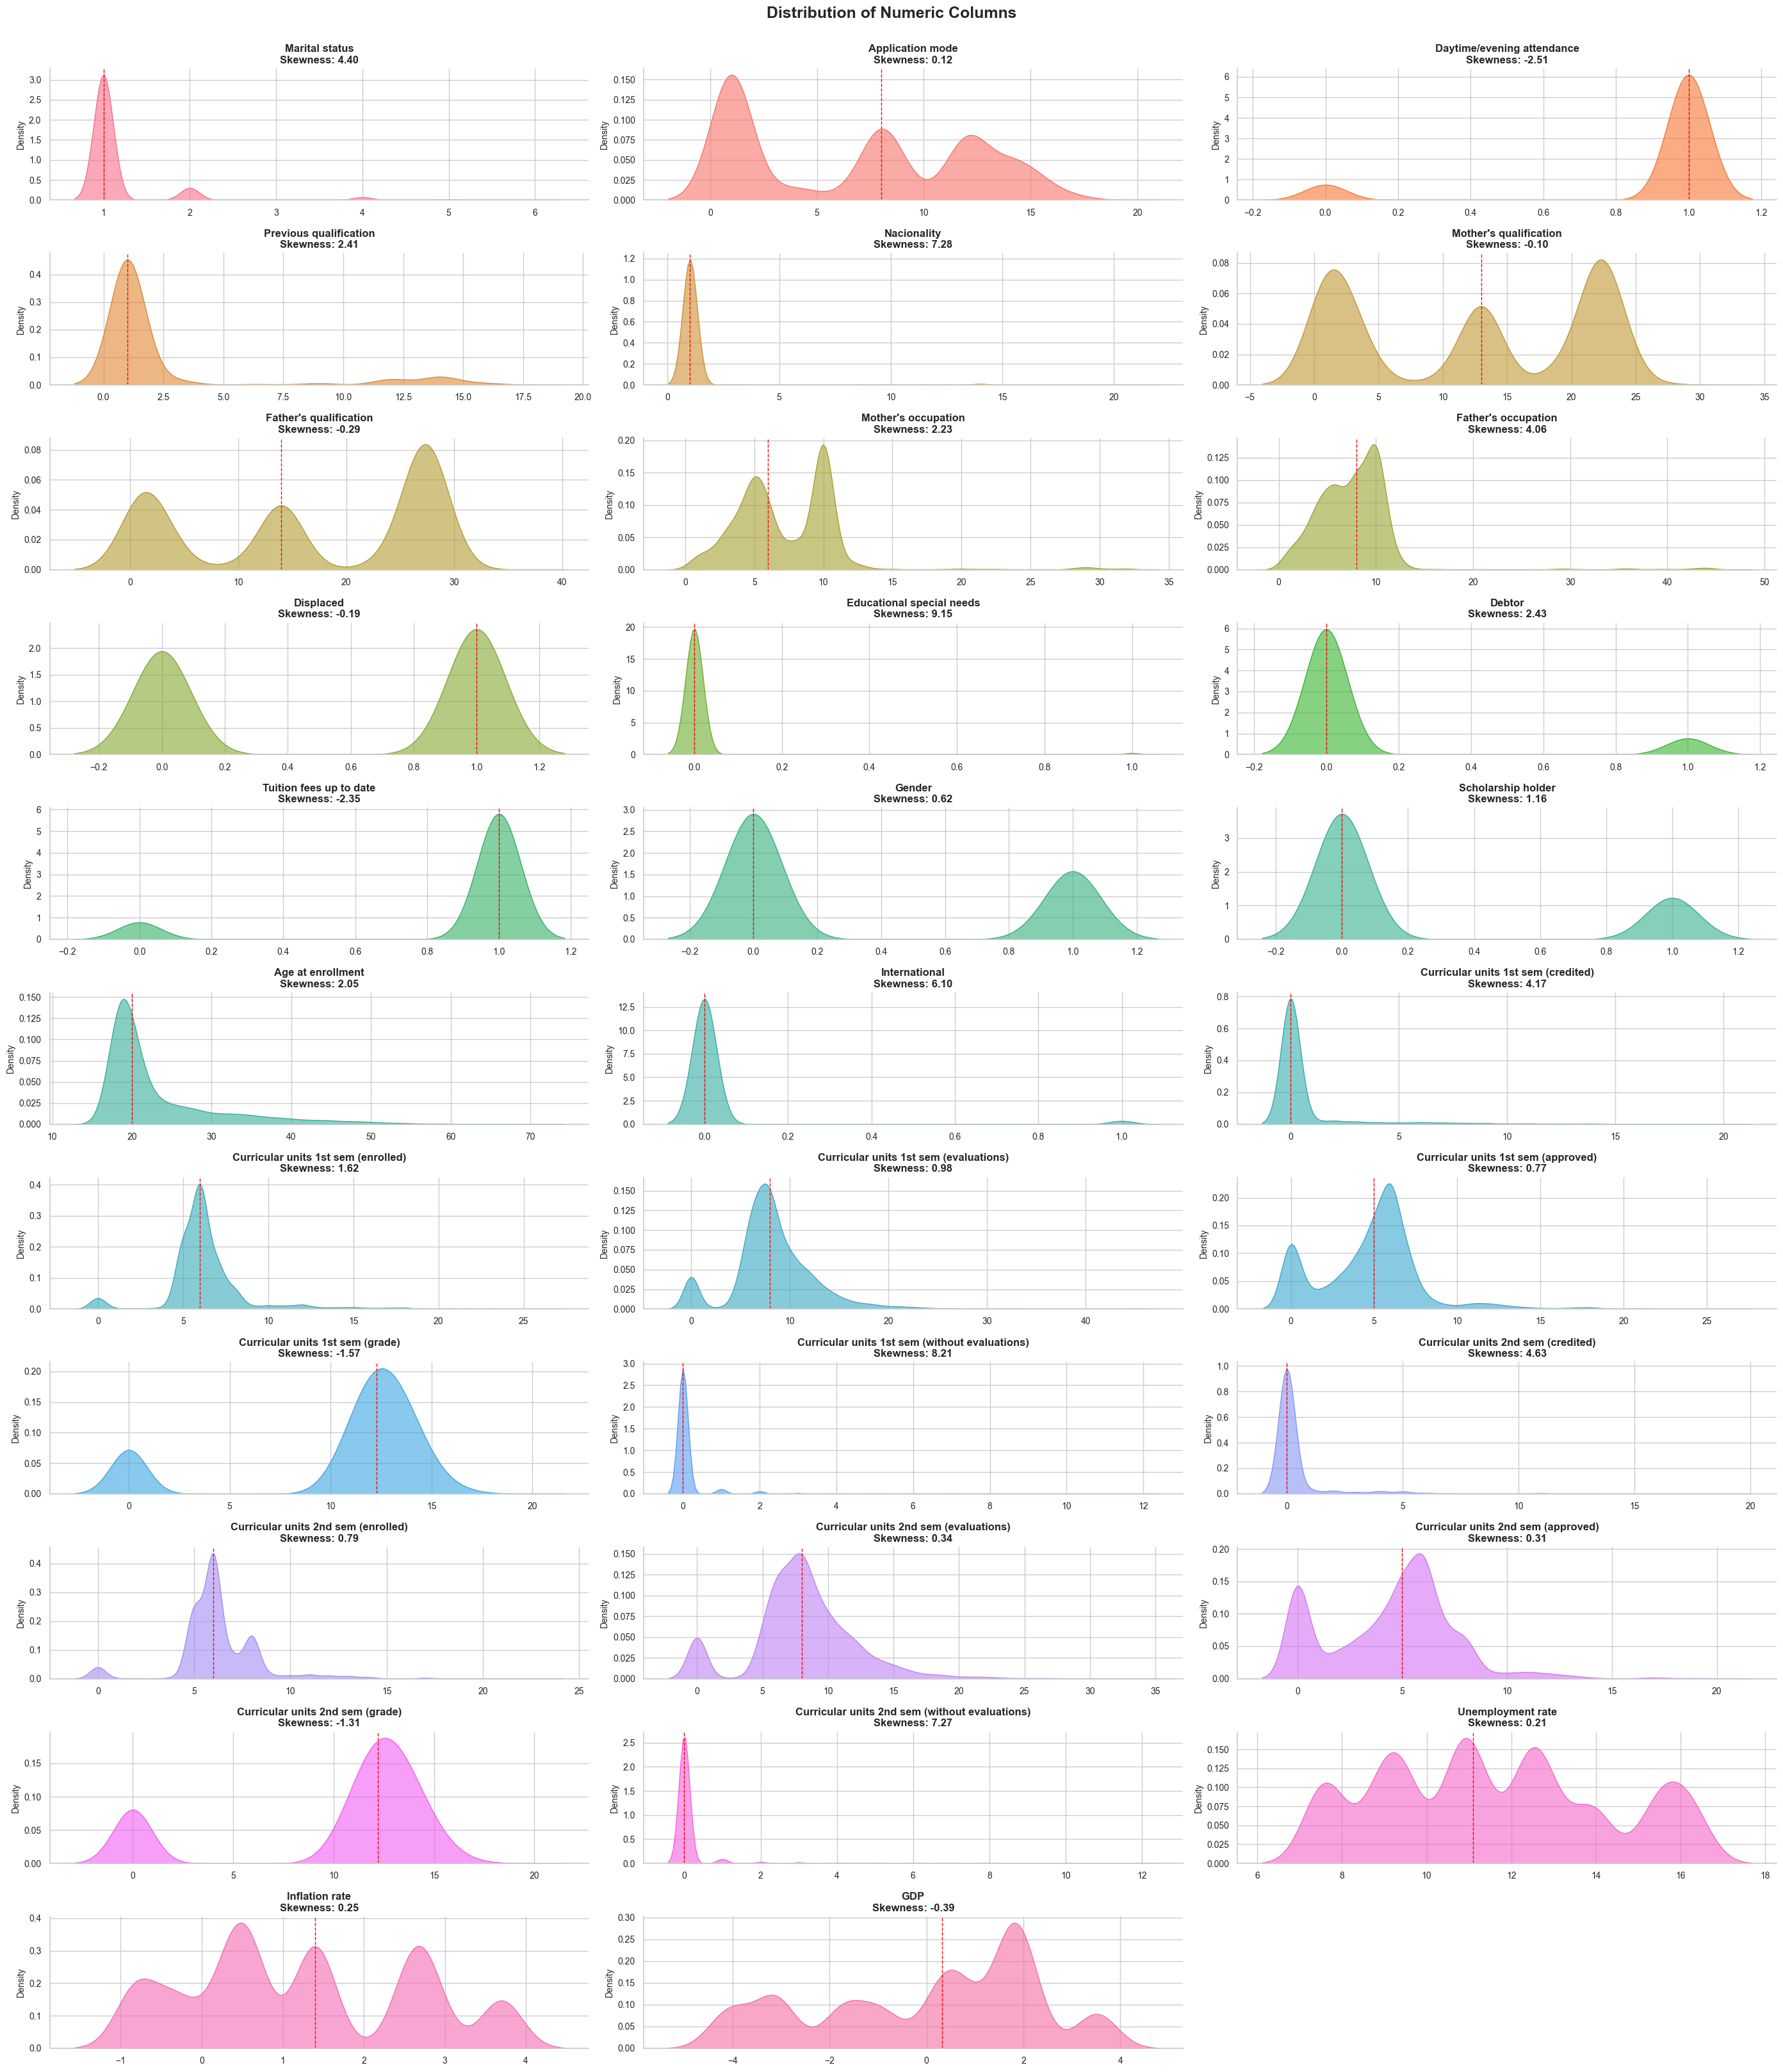

In [12]:
import math

def dist(train_dataset, columns_list, cols=3):
    columns_list = [col for col in columns_list if col != 'id']
    n = len(columns_list)
    rows = math.ceil(n / cols)

    fig, axs = plt.subplots(rows, cols, figsize=(28, rows*3))  
    axs = axs.flatten()  

    palette = sns.color_palette("husl", len(columns_list))  

    for i, col in enumerate(columns_list):
        sns.kdeplot(train_dataset[col], ax=axs[i], fill=True, alpha=0.6, linewidth=1, color=palette[i])
        axs[i].set_title(f'{col}\nSkewness: {train_dataset[col].skew():.2f}', 
                         fontsize=12, fontweight="bold")
        axs[i].set_xlabel("")  
        axs[i].set_ylabel("Density", fontsize=10) 
        axs[i].tick_params(axis='both', which='major', labelsize=10)
        axs[i].axvline(train_dataset[col].median(), color='red', linestyle='--', linewidth=1)

    # x√≥a subplot th·ª´a (n·∫øu c√≥)
    for j in range(len(columns_list), len(axs)):
        fig.delaxes(axs[j])

    fig.suptitle('Distribution of Numeric Columns', fontsize=18, fontweight="bold")  
    plt.tight_layout(rect=[0, 0, 1, 0.98])  
    sns.despine()
    plt.show()
dist(train_dataset=df, columns_list=numerical_cols, cols=3)


### Nh·∫≠n x√©t chi ti·∫øt ph√¢n ph·ªëi c√°c bi·∫øn (Distribution + Skewness)

#### 1. Nh√¢n kh·∫©u h·ªçc & th√¥ng tin c√° nh√¢n
- **Marital status (Skewness = 4.40)**: Ph√¢n b·ªë l·ªách ph·∫£i, ƒëa s·ªë sinh vi√™n ch∆∞a k·∫øt h√¥n. C√°c tr·∫°ng th√°i kh√°c r·∫•t √≠t xu·∫•t hi·ªán ‚Üí m·∫•t c√¢n b·∫±ng.  
- **Nationality (Skewness = 7.28)**: Ph√¢n b·ªë c·ª±c l·ªách ph·∫£i, h·∫ßu h·∫øt sinh vi√™n c√πng m·ªôt qu·ªëc t·ªãch ‚Üí d·ªØ li·ªáu thi·∫øu ƒëa d·∫°ng.  
- **Age at enrollment (Skewness = 2.05)**: L·ªách ph·∫£i, t·∫≠p trung ·ªü ƒë·ªô tu·ªïi 18‚Äì22. M·ªôt s·ªë gi√° tr·ªã cao (30‚Äì60) l√† outliers.  
- **Gender (Skewness = 0.62)**: T∆∞∆°ng ƒë·ªëi c√¢n b·∫±ng nh∆∞ng v·∫´n c√≥ m·ªôt gi·ªõi chi·∫øm ∆∞u th·∫ø h∆°n.  
- **International (Skewness = 6.10)**: L·ªách m·∫°nh, ƒëa s·ªë sinh vi√™n kh√¥ng thu·ªôc di·ªán qu·ªëc t·∫ø.  

üëâ **√ù nghƒ©a**: C√°c bi·∫øn n√†y cho th·∫•y m·∫´u sinh vi√™n kh√° t·∫≠p trung (qu·ªëc t·ªãch, ƒë·ªô tu·ªïi, t√¨nh tr·∫°ng h√¥n nh√¢n), c·∫ßn xem x√©t g·ªôp nh√≥m ho·∫∑c c√¢n b·∫±ng d·ªØ li·ªáu.  

---

#### 2. N·ªÅn t·∫£ng h·ªçc v·∫•n v√† gia ƒë√¨nh
- **Previous qualification (Skewness = 2.41)**: M·ªôt s·ªë lo·∫°i b·∫±ng c·∫•p chi·∫øm ƒëa s·ªë, nhi·ªÅu lo·∫°i hi·∫øm g·∫∑p.  
- **Mother‚Äôs & Father‚Äôs qualification (Skewness ‚âà -0.29; 3.12)**: Ph√¢n b·ªë kh√¥ng ƒë·ªÅu, m·ªôt s·ªë m·ª©c ƒë·ªô h·ªçc v·∫•n r·∫•t ph·ªï bi·∫øn.  
- **Mother‚Äôs & Father‚Äôs occupation (Skewness ‚âà 2.23; 4.06)**: Ph√¢n b·ªë l·ªách m·∫°nh, m·ªôt v√†i nh√≥m ngh·ªÅ nghi·ªáp n·ªïi b·∫≠t h∆°n h·∫≥n.  

üëâ **√ù nghƒ©a**: Tr√¨nh ƒë·ªô v√† ngh·ªÅ nghi·ªáp c·ªßa ph·ª• huynh c√≥ th·ªÉ ·∫£nh h∆∞·ªüng t·ªõi th√†nh t√≠ch h·ªçc t·∫≠p, nh∆∞ng d·ªØ li·ªáu kh√¥ng c√¢n b·∫±ng l√†m gi·∫£m ƒë·ªô ph√¢n bi·ªát.  

---

#### 3. Th√¥ng tin t√†i ch√≠nh & h·ªó tr·ª£
- **Tuition fees up to date (Skewness = 2.35)**: ƒêa s·ªë sinh vi√™n ƒë√≥ng h·ªçc ph√≠ ƒë√∫ng h·∫°n, r·∫•t √≠t tr∆∞·ªùng h·ª£p tr·ªÖ h·∫°n.  
- **Debtor (Skewness = 3.35)**: L·ªách m·∫°nh, ƒëa ph·∫ßn sinh vi√™n kh√¥ng n·ª£ h·ªçc ph√≠.  
- **Scholarship holder (Skewness = 1.16)**: Ch·ªß y·∫øu kh√¥ng c√≥ h·ªçc b·ªïng, m·ªôt t·ª∑ l·ªá nh·ªè ƒë∆∞·ª£c c·∫•p h·ªçc b·ªïng.  

üëâ **√ù nghƒ©a**: C√°c bi·∫øn t√†i ch√≠nh kh√° m·∫•t c√¢n b·∫±ng, ph·∫£n √°nh th·ª±c t·∫ø ch·ªâ m·ªôt s·ªë √≠t sinh vi√™n g·∫∑p kh√≥ khƒÉn t√†i ch√≠nh.  

---

#### 4. Bi·∫øn h·ªçc t·∫≠p t·∫°i tr∆∞·ªùng
- **Daytime/evening attendance (Skewness = -2.51)**: L·ªách tr√°i, ƒëa s·ªë h·ªçc ban ng√†y.  
- **Course (Skewness = -0.10)**: Ph√¢n b·ªë kh√° ƒë·ªìng ƒë·ªÅu h∆°n so v·ªõi c√°c bi·∫øn kh√°c nh∆∞ng v·∫´n c√≥ ng√†nh chi·∫øm ∆∞u th·∫ø.  
- **Educational special needs (Skewness = 91.5)**: C·ª±c k·ª≥ l·ªách, h·∫ßu h·∫øt sinh vi√™n kh√¥ng c√≥ nhu c·∫ßu ƒë·∫∑c bi·ªát.  
- **Displaced (Skewness = 0.68)**: T∆∞∆°ng ƒë·ªëi c√¢n b·∫±ng h∆°n nh∆∞ng v·∫´n thi√™n v·ªÅ nh√≥m kh√¥ng displaced.  

üëâ **√ù nghƒ©a**: M·ªôt s·ªë bi·∫øn (special needs) ch·ª©a r·∫•t √≠t d·ªØ li·ªáu c√≥ √≠ch, c√≥ th·ªÉ √≠t ƒë√≥ng g√≥p cho m√¥ h√¨nh.  

---

#### 5. K·∫øt qu·∫£ h·ªçc t·∫≠p (Curricular units & Grades)
- **Curricular units 1st sem (credited, enrolled, approved, evaluations, grade)**  
  - Skewness t·ª´ **0.77 ƒë·∫øn 4.17**.  
  - ƒêa s·ªë sinh vi√™n c√≥ s·ªë t√≠n ch·ªâ v√† ƒëi·ªÉm ·ªü m·ª©c th·∫•p‚Äìtrung b√¨nh, m·ªôt s·ªë √≠t c√≥ gi√° tr·ªã cao b·∫•t th∆∞·ªùng.  
- **Curricular units 2nd sem (t∆∞∆°ng t·ª±)**: K·∫øt qu·∫£ t∆∞∆°ng ƒë·ªìng, skewness t·ª´ **-1.31 ƒë·∫øn 7.27**.  

üëâ **√ù nghƒ©a**: ƒê√¢y l√† nh√≥m bi·∫øn quan tr·ªçng nh·∫•t ƒë·ªÉ d·ª± b√°o. Tuy nhi√™n c·∫ßn chu·∫©n h√≥a ho·∫∑c x·ª≠ l√Ω outliers ƒë·ªÉ tr√°nh ·∫£nh h∆∞·ªüng m√¥ h√¨nh.  

---

#### 6. Bi·∫øn kinh t·∫ø vƒ© m√¥
- **Unemployment rate (Skewness = 0.21)**: Ph√¢n b·ªë kh√° ƒë·ªÅu, kh√¥ng qu√° l·ªách.  
- **Inflation rate (Skewness = 0.25)**: Ph√¢n b·ªë chu·∫©n g·∫ßn ƒë·ªëi x·ª©ng.  
- **GDP (Skewness = -0.39)**: Ph√¢n b·ªë g·∫ßn chu·∫©n, h∆°i l·ªách tr√°i nh·∫π.  

üëâ **√ù nghƒ©a**: C√°c bi·∫øn n√†y ·ªïn ƒë·ªãnh v√† c√≥ th·ªÉ ƒë∆∞·ª£c gi·ªØ nguy√™n, kh√¥ng c·∫ßn bi·∫øn ƒë·ªïi nhi·ªÅu.  

---

### T·ªïng k·∫øt chung
- Nhi·ªÅu bi·∫øn c√≥ **skewness cao** (Nationality, Educational special needs, International) ‚Üí ph√¢n b·ªë c·ª±c l·ªách, th√¥ng tin h·∫°n ch·∫ø.  
- C√°c bi·∫øn h·ªçc t·∫≠p (Curricular units, Grades) ch·ª©a nhi·ªÅu th√¥ng tin quan tr·ªçng nh∆∞ng c√≥ outliers ‚Üí c·∫ßn chu·∫©n h√≥a.  
- Bi·∫øn vƒ© m√¥ (GDP, Inflation, Unemployment) ph√¢n b·ªë t·ªët ‚Üí c√≥ th·ªÉ gi·ªØ nguy√™n.  
- C·∫ßn √°p d·ª•ng c√°c k·ªπ thu·∫≠t x·ª≠ l√Ω skewness (log-transform, Box-Cox, resampling) v√† c√¢n b·∫±ng d·ªØ li·ªáu ƒë·ªÉ c·∫£i thi·ªán hi·ªáu qu·∫£ m√¥ h√¨nh.  


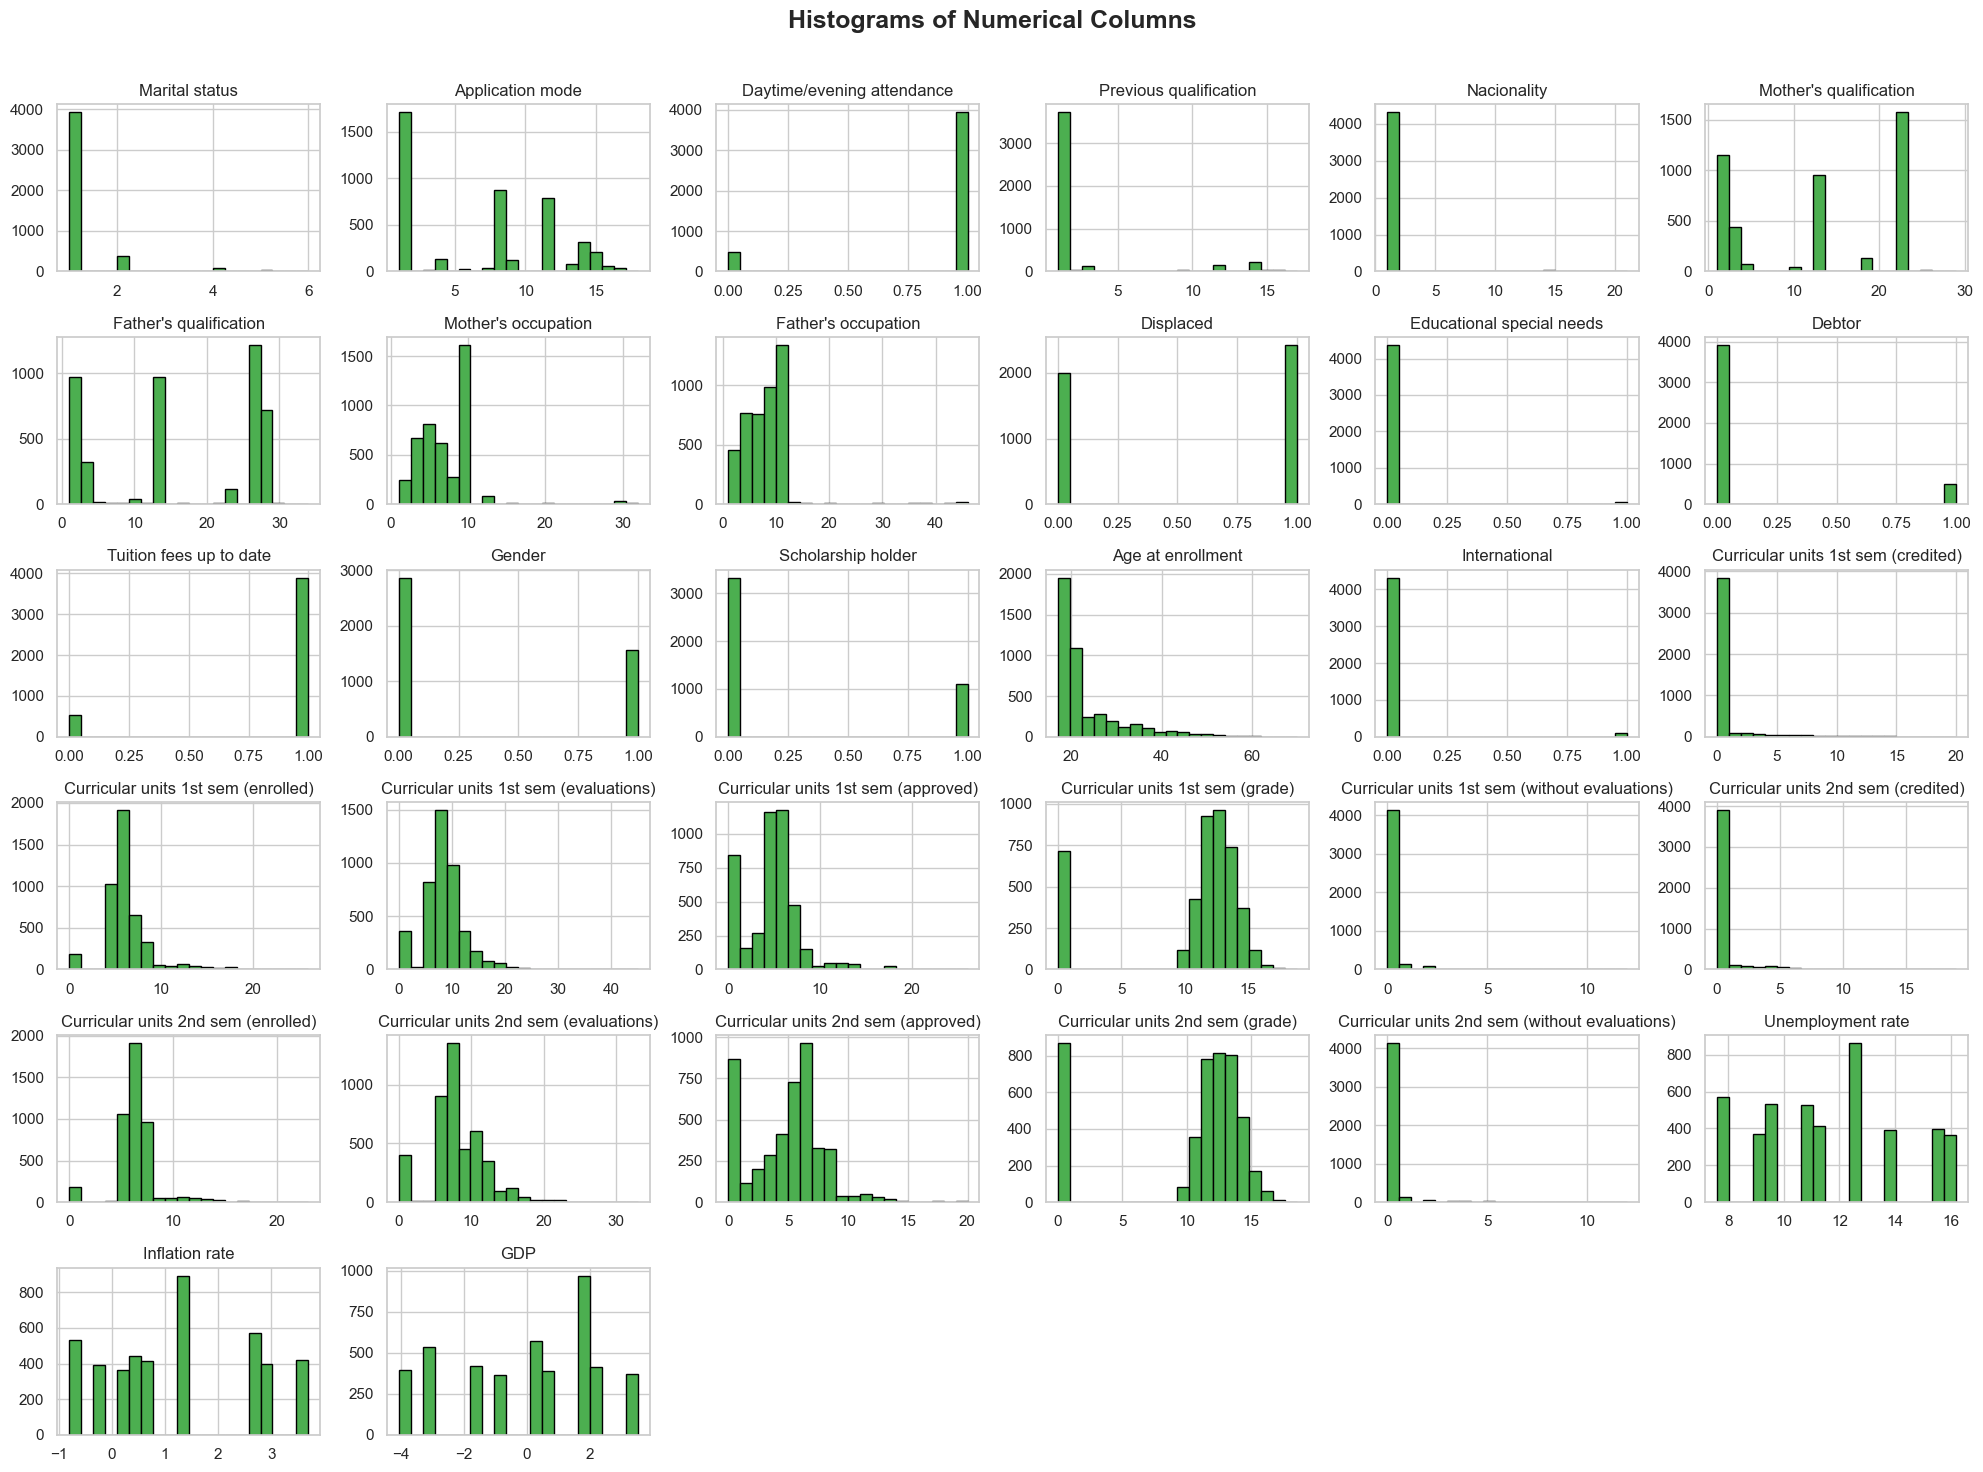

In [13]:
df[numerical_cols].hist(figsize=(20, 15), color='#4CAF50', edgecolor='black', bins=20)
plt.gcf().set_facecolor('white')
plt.suptitle("Histograms of Numerical Columns", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### Nh·∫≠n x√©t bi·ªÉu ƒë·ªì Histogram c·ªßa c√°c bi·∫øn

#### 1. Bi·∫øn nh√¢n kh·∫©u h·ªçc (Demographics)
- **Marital status**: ƒêa s·ªë sinh vi√™n ch∆∞a k·∫øt h√¥n (gi√° tr·ªã = 1). C√°c nh√≥m kh√°c r·∫•t √≠t, g√¢y m·∫•t c√¢n b·∫±ng.  
- **Nationality**: Ch·ªß y·∫øu t·∫≠p trung v√†o m·ªôt v√†i qu·ªëc t·ªãch ‚Üí m·∫•t c√¢n ƒë·ªëi.  
- **Age at enrollment**: Ph√¢n b·ªë l·ªách ph·∫£i, t·∫≠p trung m·∫°nh ·ªü ƒë·ªô tu·ªïi 18‚Äì22, c√≥ m·ªôt s·ªë outliers tr√™n 30‚Äì60 tu·ªïi.  
- **Gender**: M·∫•t c√¢n b·∫±ng, m·ªôt gi·ªõi chi·∫øm ∆∞u th·∫ø.  

**Nh·∫≠n x√©t chung**: C√°c bi·∫øn n√†y cho th·∫•y **s·ª± t·∫≠p trung m·∫°nh v√†o m·ªôt nh√≥m ch√≠nh**, c·∫ßn x·ª≠ l√Ω m·∫•t c√¢n b·∫±ng ho·∫∑c g·ªôp nh√≥m.

---

#### 2. Bi·∫øn h·ªçc t·∫≠p tr∆∞·ªõc khi nh·∫≠p h·ªçc
- **Previous qualification**: M·ªôt s·ªë lo·∫°i b·∫±ng c·∫•p xu·∫•t hi·ªán r·∫•t nhi·ªÅu, s·ªë c√≤n l·∫°i hi·∫øm.  
- **Mother‚Äôs & Father‚Äôs qualification**: Ph√¢n b·ªë l·ªách, nhi·ªÅu gi√° tr·ªã √≠t xu·∫•t hi·ªán.  
- **Application mode & Application order**: M·ªôt s·ªë h√¨nh th·ª©c v√† th·ª© t·ª± ƒë∆∞·ª£c ch·ªçn nhi·ªÅu v∆∞·ª£t tr·ªôi so v·ªõi c√°c gi√° tr·ªã kh√°c.  

**Nh·∫≠n x√©t chung**: C√°c bi·∫øn n√†y ch·ª©a nhi·ªÅu gi√° tr·ªã ph√¢n lo·∫°i hi·∫øm (low-frequency categories). C·∫ßn g·ªôp nh√≥m ho·∫∑c lo·∫°i b·ªè ƒë·ªÉ tr√°nh noise.

---

#### 3. Bi·∫øn h·ªçc t·∫≠p t·∫°i tr∆∞·ªùng
- **Daytime/evening attendance**: ƒêa s·ªë h·ªçc ban ng√†y.  
- **Course**: M·ªôt s·ªë ng√†nh c√≥ s·ªë l∆∞·ª£ng sinh vi√™n v∆∞·ª£t tr·ªôi, c√°c ng√†nh kh√°c √≠t ng∆∞·ªùi ch·ªçn.  
- **Scholarship holder**: Ph·∫ßn l·ªõn sinh vi√™n kh√¥ng nh·∫≠n h·ªçc b·ªïng.  
- **Tuition fees up to date**: ƒêa s·ªë sinh vi√™n ƒë√≥ng h·ªçc ph√≠ ƒë√∫ng h·∫°n, r·∫•t √≠t kh√¥ng ƒë√∫ng h·∫°n.  
- **Debtor**: R·∫•t nhi·ªÅu sinh vi√™n kh√¥ng n·ª£ h·ªçc ph√≠, s·ªë √≠t c√≥ n·ª£.  
- **Displaced, International, Educational special needs**: ƒêa s·ªë b·∫±ng 0 ‚Üí r·∫•t √≠t sinh vi√™n trong nh√≥m n√†y.  

**Nh·∫≠n x√©t chung**: C√°c bi·∫øn n√†y m·∫•t c√¢n b·∫±ng n·∫∑ng, ch·ªß y·∫øu t·∫≠p trung v√†o m·ªôt tr·∫°ng th√°i (th∆∞·ªùng l√† 0 ho·∫∑c kh√¥ng c√≥).  

---

#### 4. Bi·∫øn h·ªçc t·∫≠p theo h·ªçc k·ª≥
- **Curricular units 1st & 2nd sem (credited, enrolled, approved, grade)**:  
  - Ph√¢n b·ªë l·ªách ph·∫£i (ƒëa s·ªë ·ªü m·ª©c th·∫•p ƒë·∫øn trung b√¨nh).  
  - S·ªë l·∫ßn ƒëƒÉng k√Ω, s·ªë t√≠n ch·ªâ ƒë·∫°t v√† ƒëi·ªÉm s·ªë ƒëa ph·∫ßn r∆°i v√†o nh√≥m trung b√¨nh, √≠t c√≥ gi√° tr·ªã qu√° cao.  
- **Curricular units (evaluations, without evaluations)**: Ch·ªß y·∫øu sinh vi√™n c√≥ √≠t l·∫ßn ƒë√°nh gi√° ho·∫∑c kh√¥ng c√≥ ƒë√°nh gi√°.  

**Nh·∫≠n x√©t chung**: C√°c bi·∫øn n√†y ph·∫£n √°nh r√µ nƒÉng l·ª±c h·ªçc t·∫≠p ‚Üí d·ªØ li·ªáu quan tr·ªçng ƒë·ªÉ ph√¢n lo·∫°i Dropout/Graduate. Tuy nhi√™n, c√≥ m·ªôt s·ªë outliers (sinh vi√™n ƒëƒÉng k√Ω qu√° nhi·ªÅu m√¥n ho·∫∑c ƒëi·ªÉm b·∫•t th∆∞·ªùng).  

---

#### 5. Bi·∫øn kinh t·∫ø vƒ© m√¥
- **Unemployment rate, Inflation rate, GDP**:  
  - Ph√¢n b·ªë g·∫ßn nh∆∞ ƒë·ªìng ƒë·ªÅu.  
  - Kh√¥ng c√≥ c·ª±c tr·ªã r√µ r·ªát.  

**Nh·∫≠n x√©t chung**: C√°c bi·∫øn n√†y ·ªïn ƒë·ªãnh, kh√¥ng c·∫ßn x·ª≠ l√Ω ƒë·∫∑c bi·ªát, nh∆∞ng c√≥ th·ªÉ ch·ªâ ·∫£nh h∆∞·ªüng gi√°n ti·∫øp ƒë·∫øn k·∫øt qu·∫£ h·ªçc t·∫≠p.  

---

### T·ªïng k·∫øt
- **M·∫•t c√¢n b·∫±ng d·ªØ li·ªáu**: Nhi·ªÅu bi·∫øn t·∫≠p trung m·∫°nh v√†o m·ªôt gi√° tr·ªã (v√≠ d·ª•: Gender, Marital status, Debtor, Scholarship).  
- **Outliers**: Xu·∫•t hi·ªán ·ªü c√°c bi·∫øn nh∆∞ Age at enrollment, Curricular units (m·ªôt s·ªë sinh vi√™n c√≥ gi√° tr·ªã c·ª±c cao).  
- **Th√¥ng tin gi√° tr·ªã**: C√°c bi·∫øn v·ªÅ h·ªçc t·∫≠p (Curricular units, Grades) v√† h·ªçc ph√≠ (Debtor, Tuition fees up to date) mang nhi·ªÅu th√¥ng tin d·ª± b√°o cho m√¥ h√¨nh.  


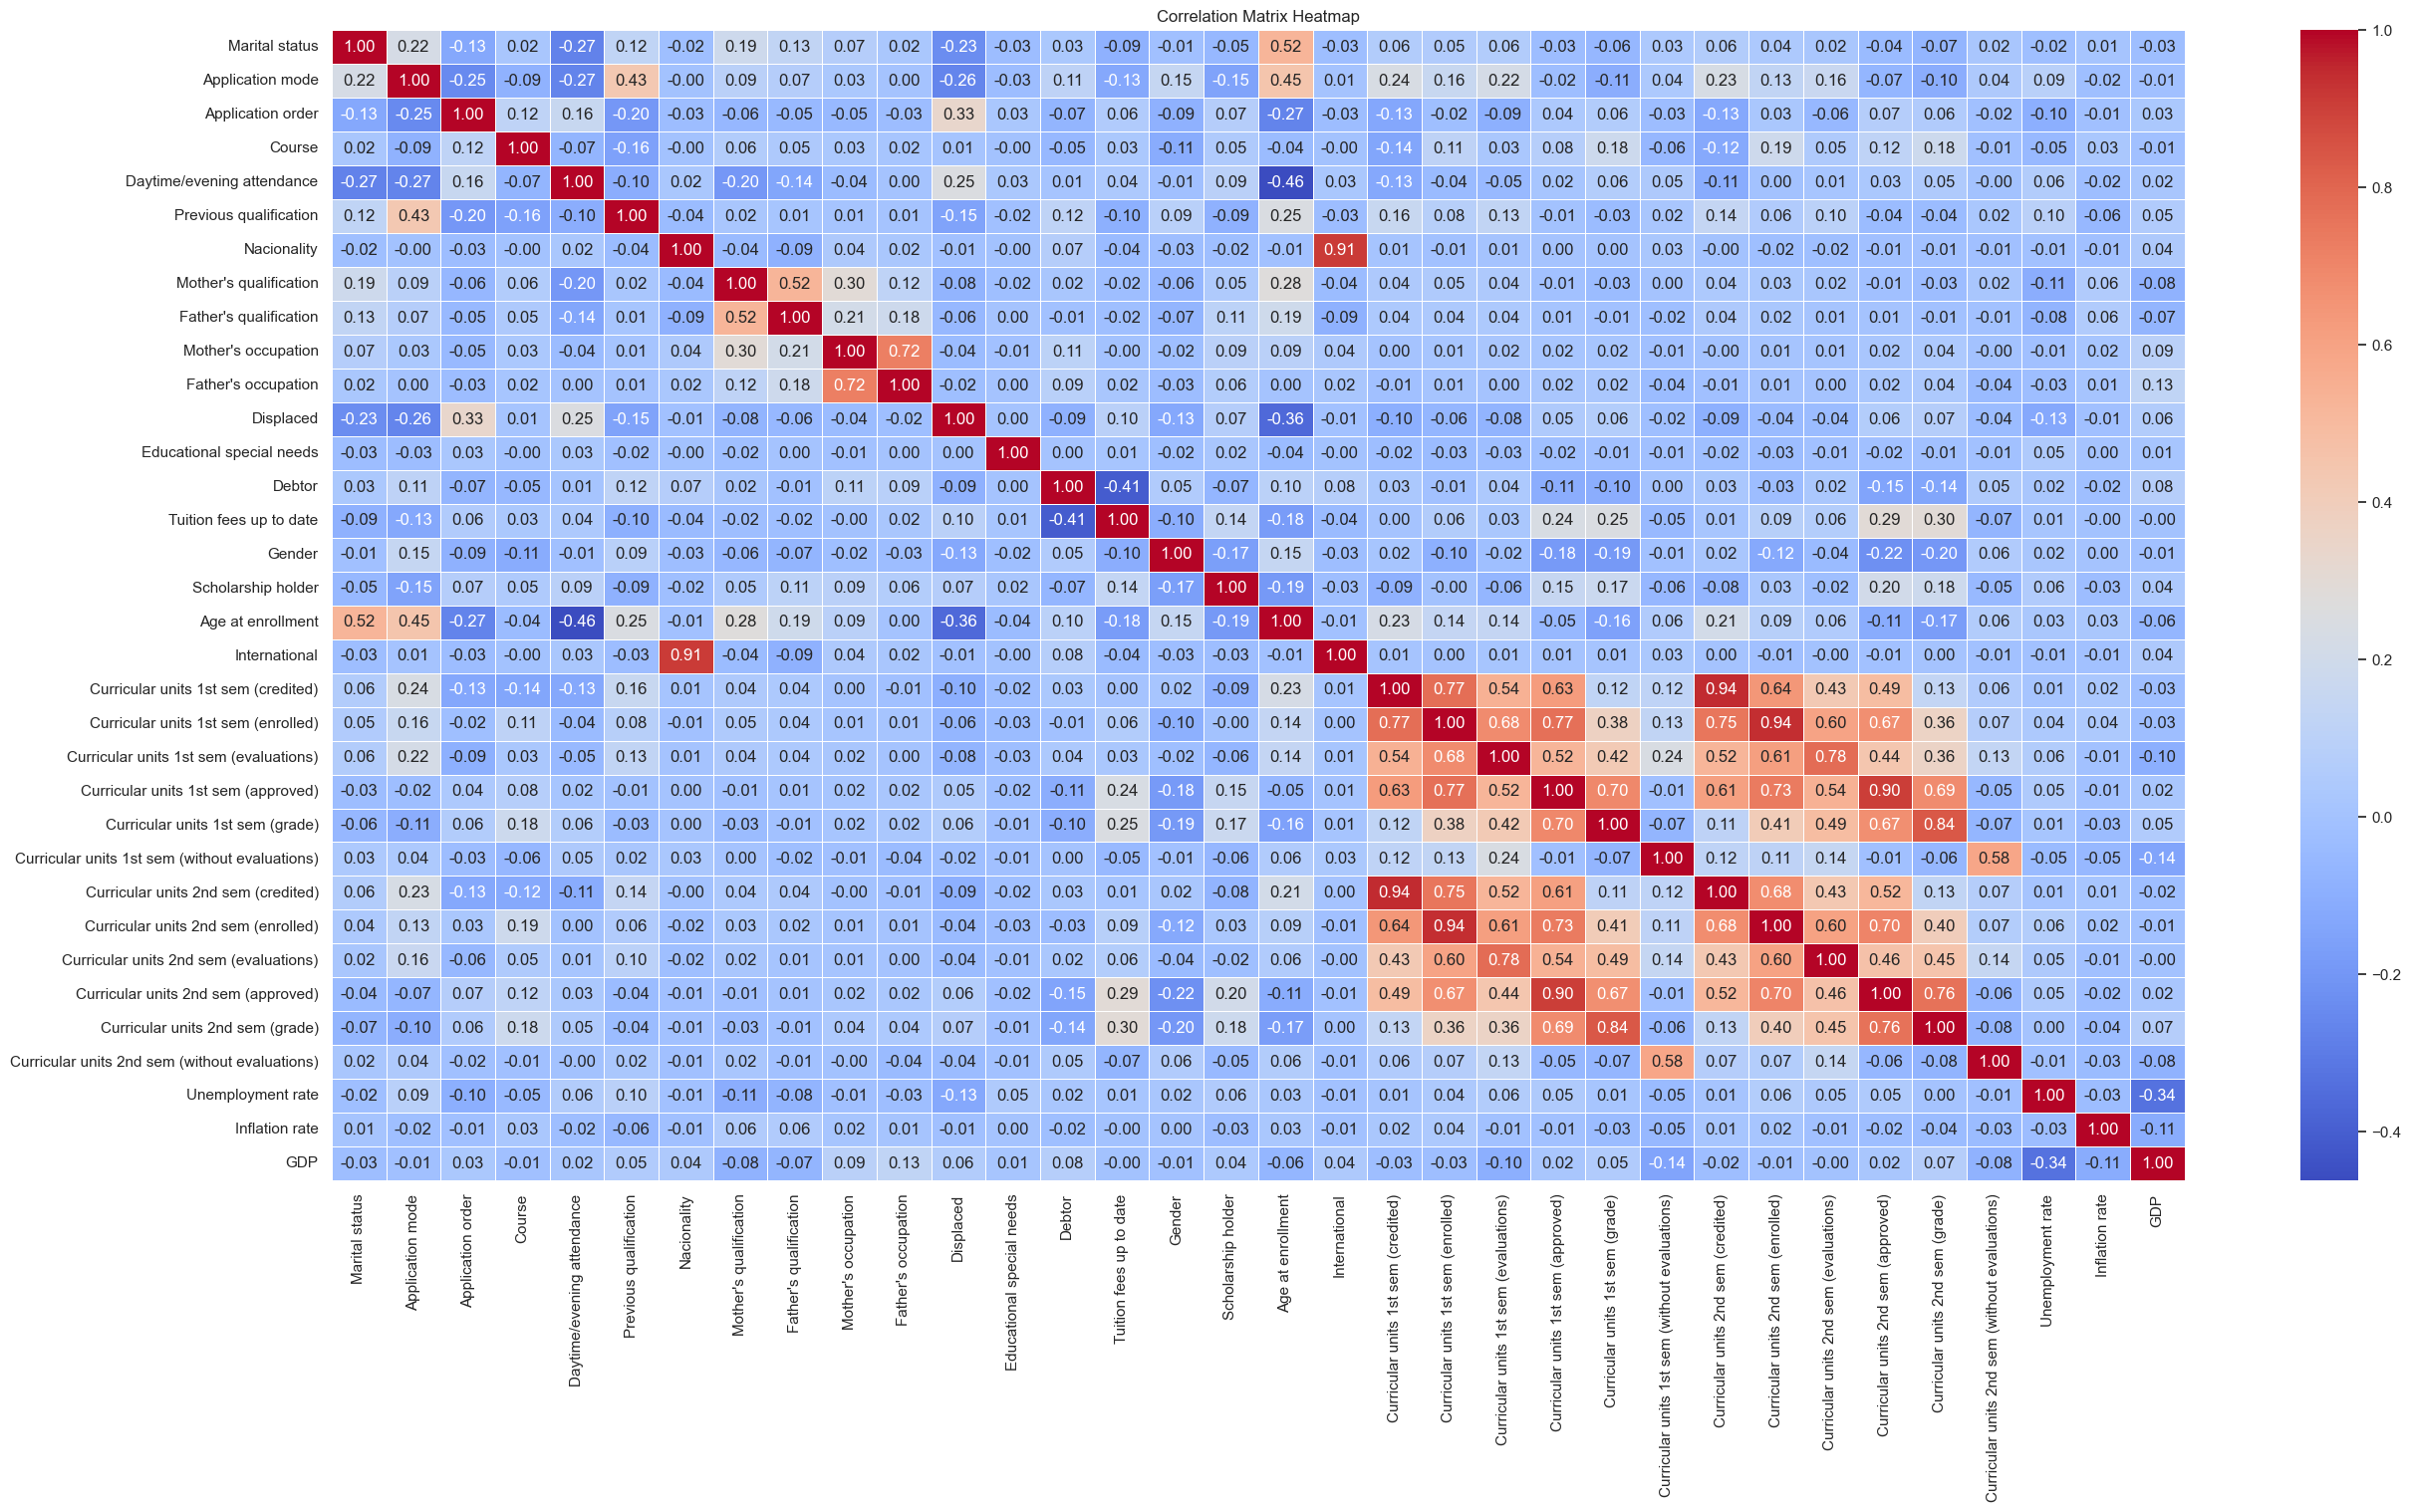

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ch·ªâ l·∫•y c·ªôt d·∫°ng s·ªë
numeric_df = df.select_dtypes(include=['number'])

# Ma tr·∫≠n t∆∞∆°ng quan
corr_matrix = numeric_df.corr()

# V·∫Ω heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.7)

plt.title("Correlation Matrix Heatmap")
plt.show()


In [16]:

from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# === 2. X·ª≠ l√Ω ngo·∫°i l·ªá (Outliers) ===
# S·ª≠ d·ª•ng RobustScaler (gi·∫£m ·∫£nh h∆∞·ªüng c·ªßa outliers)
scaler = RobustScaler()
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# === 3. X·ª≠ l√Ω ph√¢n ph·ªëi l·ªách (Skewness) ===
# √Åp d·ª•ng Power Transformation (Yeo-Johnson) cho c√°c bi·∫øn l·ªách m·∫°nh
pt = PowerTransformer(method='yeo-johnson')
df[num_cols] = pt.fit_transform(df[num_cols])

# === 4. Bi·∫øn m·ª•c ti√™u v√† g·ªôp nh√≥m Success / Failure ===
df['Target'] = df['Target'].replace({'Graduate': 'Success', 'Enrolled': 'Success', 'Dropout': 'Failure'})

# === 5. X·ª≠ l√Ω m·∫•t c√¢n b·∫±ng l·ªõp (Class imbalance) ===
X = df.drop(columns=['Target'])
y = df['Target']

# One-hot encoding tr∆∞·ªõc khi SMOTE
X = pd.get_dummies(X, drop_first=True)

# Chia train/test tr∆∞·ªõc khi oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# √Åp d·ª•ng SMOTE tr√™n t·∫≠p train
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# === 6. Gi·∫£m ƒëa c·ªông tuy·∫øn (Multicollinearity) ===
# PCA ch·ªâ th·ª±c hi·ªán khi c·∫ßn gi·∫£m chi·ªÅu (v√≠ d·ª• gi·ªØ l·∫°i 95% ph∆∞∆°ng sai)
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test)

# === 7. Chu·∫©n h√≥a d·ªØ li·ªáu (Scaling) ===
# RobustScaler ƒë√£ √°p d·ª•ng ·ªü b∆∞·ªõc ƒë·∫ßu ‚Üí kh√¥ng c·∫ßn th√™m StandardScaler
# N·∫øu d√πng PCA th√¨ d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a tr∆∞·ªõc ƒë√≥

print("K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau x·ª≠ l√Ω:")
print("X_train:", X_train_pca.shape, "y_train:", y_train_res.shape)
print("X_test:", X_test_pca.shape, "y_test:", y_test.shape)


K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau x·ª≠ l√Ω:
X_train: (4804, 25) y_train: (4804,)
X_test: (885, 25) y_test: (885,)


In [17]:
# === Import c√°c th∆∞ vi·ªán c·∫ßn thi·∫øt ===
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# === Logistic Regression ===
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_pca, y_train_res)

y_pred_log = log_reg.predict(X_test_pca)

print("==== Logistic Regression ====")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


==== Logistic Regression ====
Accuracy: 0.8418079096045198
              precision    recall  f1-score   support

     Failure       0.74      0.77      0.76       284
     Success       0.89      0.88      0.88       601

    accuracy                           0.84       885
   macro avg       0.82      0.82      0.82       885
weighted avg       0.84      0.84      0.84       885



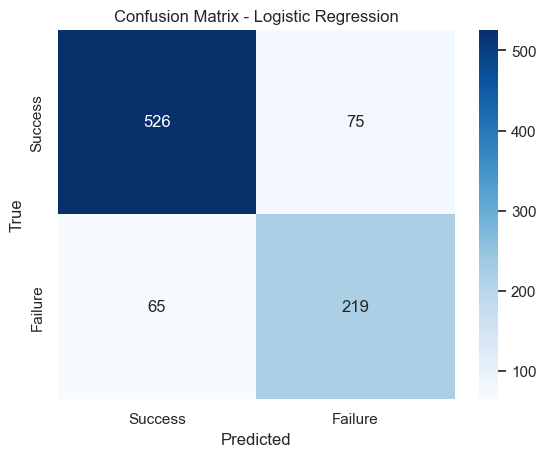

In [18]:

# Confusion Matrix Logistic
cm_log = confusion_matrix(y_test, y_pred_log, labels=["Success", "Failure"])
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", xticklabels=["Success", "Failure"], yticklabels=["Success", "Failure"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



In [19]:

# === Decision Tree ===
tree = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)
tree.fit(X_train_pca, y_train_res)

y_pred_tree = tree.predict(X_test_pca)

print("\n==== Decision Tree ====")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))



==== Decision Tree ====
Accuracy: 0.8214689265536723
              precision    recall  f1-score   support

     Failure       0.73      0.71      0.72       284
     Success       0.86      0.87      0.87       601

    accuracy                           0.82       885
   macro avg       0.80      0.79      0.79       885
weighted avg       0.82      0.82      0.82       885



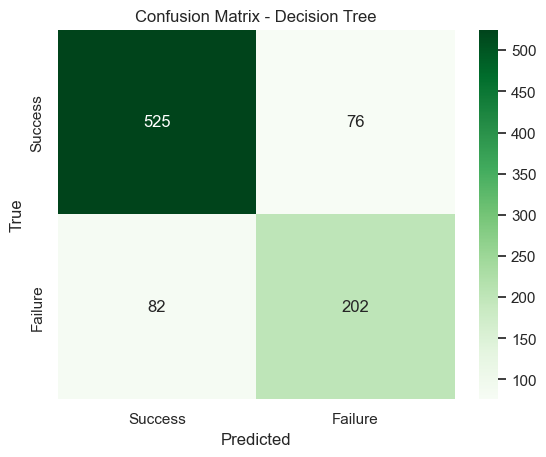

In [20]:

# Confusion Matrix Tree
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=["Success", "Failure"])
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens", xticklabels=["Success", "Failure"], yticklabels=["Success", "Failure"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
